# Graduate Admission Prediction Using Machine Learning

- Read the data. The data can be downloaded from [here](https://www.kaggle.com/datasets/mohansacharya/graduate-admissions?select=Admission_Predict_Ver1.1.csv).

- Do some EDA.

- Preprocess the data

- Building a regression model

- Save the model

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
import json

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
import joblib

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

### Read the data

In [2]:
data = pd.read_csv("../data/Admission_Prediction.csv")

data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


### Remove the spaces from the name of the columns

In [4]:
columns = data.columns.to_list()

rename_columns = []

for x in columns:
    rename_columns.append(x.strip().replace(' ', '_'))

rename_columns

data.columns = rename_columns

data.head()

,Serial_No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### EDA

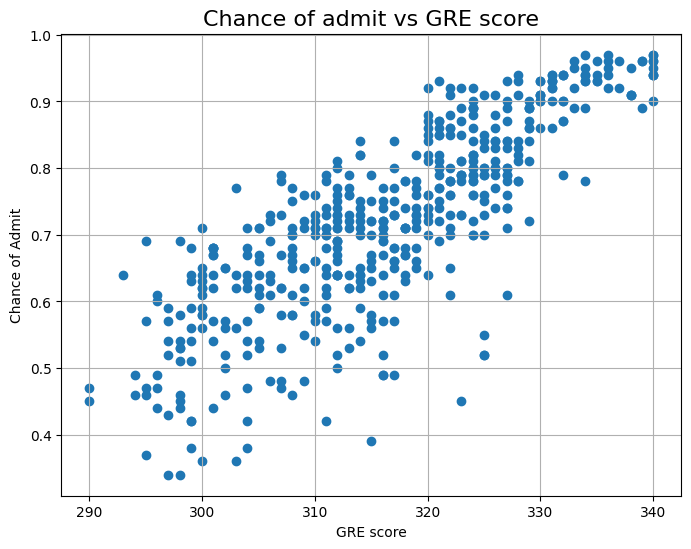

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(x=data['GRE_Score'], y=data["Chance_of_Admit"])
plt.grid()
plt.xlabel("GRE score")
plt.ylabel("Chance of Admit")
plt.title("Chance of admit vs GRE score", fontsize=16)
plt.show()

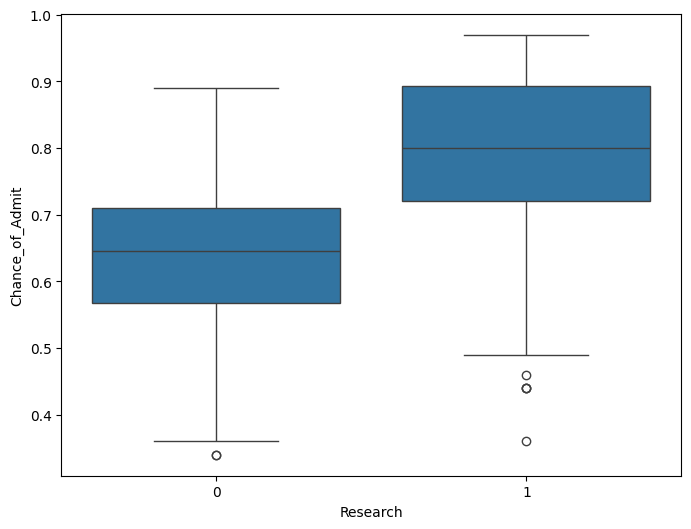

In [6]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['Research'], y=data['Chance_of_Admit'])
plt.show()

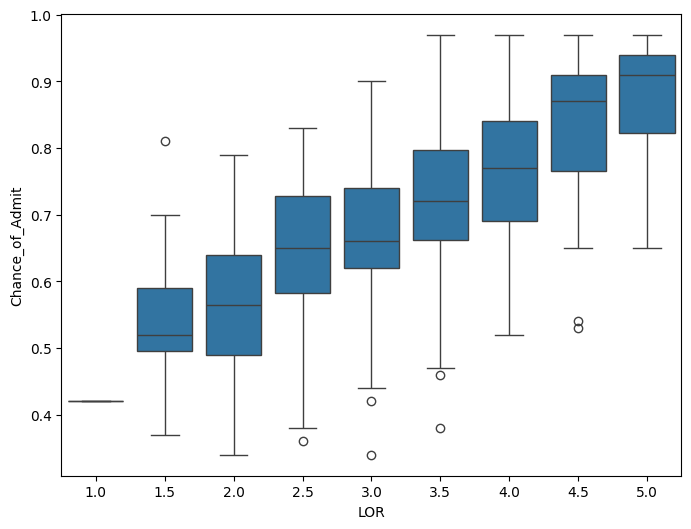

In [7]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['LOR'], y=data['Chance_of_Admit'])
plt.show()

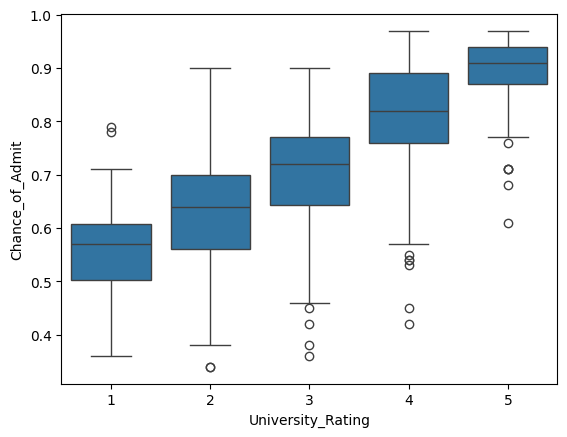

In [8]:
sns.boxplot(x=data['University_Rating'], y=data['Chance_of_Admit'])
plt.show()

In [9]:
data.columns

Index(['Serial_No.', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance_of_Admit'],
      dtype='object')

In [10]:
features = ['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP',
       'LOR', 'CGPA', 'Research']

scale_features = ['GRE_Score', 'TOEFL_Score', 'CGPA', 'University_Rating', 'SOP',
       'LOR']

not_scale_features = ['Research']

### Train test split 

In [11]:
X = data[features]
y = data['Chance_of_Admit'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, shuffle=True)

X_train.shape, X_test.shape

((400, 7), (100, 7))

### Data Preprocessing

In [12]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), scale_features),
        ('pass', "passthrough", not_scale_features)
    ]
)

In [13]:
X_train = preprocessor.fit_transform(X_train)

X_test = preprocessor.transform(X_test)

### Building the Linear Regression model

In [14]:
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Model evaluation

#### On training data

In [15]:
y_train_pred = lr_model.predict(X_train)

print(f"The R2 score on training data: {r2_score(y_true=y_train, y_pred=y_train_pred):.2f}")

The R2 score on training data: 0.83


In [16]:
print(f"Mean squar error on training data: {mean_squared_error(y_train, y_train_pred):.4f}")

Mean squar error on training data: 0.0034


In [17]:
y_test_pred = lr_model.predict(X_test)

print(f"The R2 score on test data: {r2_score(y_true=y_test, y_pred=y_test_pred):.2f}")

The R2 score on test data: 0.78


In [18]:
print(f"Mean squar error on test data: {mean_squared_error(y_test, y_test_pred):.4f}")

Mean squar error on test data: 0.0043


In [19]:
pd.DataFrame(zip(y_test, y_test_pred, np.abs(y_test-y_test_pred)), columns=['Actual', 'Predicted', 'Abs. Difference']).head(10)

,Actual,Predicted,Abs. Difference
0,0.82,0.807689,0.012311
1,0.94,0.934799,0.005201
2,0.69,0.530379,0.159621
3,0.65,0.623626,0.026374
4,0.79,0.817914,0.027914
5,0.77,0.700343,0.069657
6,0.90,0.875832,0.024168
7,0.73,0.776623,0.046623
8,0.64,0.620566,0.019434
9,0.89,0.883939,0.006061


### Create the preprocessing + model Pipeline with entire data

In [20]:
model_pipeline = make_pipeline(preprocessor, lr_model)

model_pipeline

,steps,"[('columntransformer', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('pass', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [21]:
model_pipeline.fit(X, y)

,steps,"[('columntransformer', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('pass', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [22]:
y_pred = model_pipeline.predict(X)

r2_score(y, y_pred)

0.8219007395178417

### Save the model + Preprocess pipeline

In [23]:
# check if the model folder exist
if not os.path.exists("../models"):
    # If the folder doesn't exis, create it
    os.makedirs("../models")

joblib.dump(model_pipeline, "../models/linear_regression_with_preprocess.joblib")

['../models/linear_regression_with_preprocess.joblib']

In [24]:
model_pipeline.feature_names_in_

array(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR',
       'CGPA', 'Research'], dtype=object)

In [25]:
model_pipeline[0].get_feature_names_out()

array(['num__GRE_Score', 'num__TOEFL_Score', 'num__CGPA',
       'num__University_Rating', 'num__SOP', 'num__LOR', 'pass__Research'],
      dtype=object)

### Save the other necessary details in config file

In [26]:
config = {
    "data_file_name": "Admission_Predict.csv",
    "model_file_name": "linear_regression_with_preprocess.joblib",
    "model_type": "LinearRegression",
    "features": ", ".join(features)
}

In [27]:
# We will put this inside ../src/config.json file
# usually configs are stored in a separate folder, 
# but for a small project we can place it inside src folder

with open("../config.json", "w") as json_file:
    json.dump(config, json_file, indent=4)